In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import datetime

# Import API key
from api_keys import sport_key

In [2]:
# Take in all of our wrestling data and read it into pandas
all_players_2014 = "Resources/all_players_2014.csv"
all_players_2015 = "Resources/all_players_2015.csv"
all_players_2016 = "Resources/all_players_2016.csv"
all_players_2017 = "Resources/all_players_2017.csv"
all_players_2018 = "Resources/all_players_2018.csv"

all_players_2014_df = pd.read_csv(all_players_2014)
all_players_2015_df = pd.read_csv(all_players_2015)
all_players_2016_df = pd.read_csv(all_players_2016)
all_players_2017_df = pd.read_csv(all_players_2017)
all_players_2018_df = pd.read_csv(all_players_2018)

In [3]:
# Append all datasets
combined_playing_years_df = all_players_2014_df
combined_playing_years_df = combined_playing_years_df.append(all_players_2015_df)
combined_playing_years_df = combined_playing_years_df.append(all_players_2016_df)
combined_playing_years_df = combined_playing_years_df.append(all_players_2017_df)
combined_playing_years_df = combined_playing_years_df.append(all_players_2018_df)

combined_playing_years_df.to_csv(f"Resources/combined_playing_years_df.csv", index=False)

combined_playing_years_df.head()

,Player_ID,Player_Name,Position,Season_Year,Team_name
0,0268a19e-6227-4fba-83fd-6aa52176dc3a,Steve Maneri,TE,2014,Patriots
1,05526dc5-8397-4741-81bb-46ef2aba446e,Bruce Gaston,DT,2014,Patriots
2,0ad26168-7f0e-4eb9-8776-7166b5ebab16,Brandon Browner,CB,2014,Patriots
3,10616740-2c72-4207-b8ed-9da09ecba854,Ryan Wendell,G,2014,Patriots
4,170b4c5f-a345-4899-8d81-e8982b0f3d65,Stevan Ridley,RB,2014,Patriots


In [4]:
all_QBs = combined_playing_years_df[combined_playing_years_df['Position']=='QB']
all_QBs = all_QBs.reset_index()
all_QBs = all_QBs.drop(columns = ['index'])


all_QBs_df = pd.DataFrame(all_QBs)
all_QBs_df['Player_ID'].unique()
all_QBs_df.to_csv(f"Resources/all_QBs.csv", index=False)
all_QBs_df.head()

,Player_ID,Player_Name,Position,Season_Year,Team_name
0,41c44740-d0f6-44ab-8347-3b5d515e5ecf,Tom Brady,QB,2014,Patriots
1,42de9d1d-0352-460b-9172-9452414fd7fd,Jimmy Garoppolo,QB,2014,Patriots
2,19d00799-4271-40ac-b5c4-4ea8b410a704,E.J. Manuel,QB,2014,Bills
3,5812204c-6dae-4450-8011-99e0f72864ac,Ryan Tannehill,QB,2014,Dolphins
4,76d7615e-8eb5-4761-b6a6-1e895d01baf3,Matt Moore,QB,2014,Dolphins


In [5]:
all_QBs_unique = all_QBs_df['Player_ID'].unique()
len(all_QBs_unique)

153

# Extract al QB data and save the results in a CSV file

In [7]:
all_QBs_profile = []

for qb in range(len(all_QBs_unique)):
    player_url = f"http://api.sportradar.us/nfl/official/trial/v5/en/players/{all_QBs_unique[qb]}/profile.json?"
    player_query_url = f"{player_url}api_key={sport_key}"
    print(f"reading player # {qb} ")
    player_response = requests.get(player_query_url)
    all_QBs_profile.append(player_response.json())

    time.sleep(1.5)

print("------------------")
print("Process Completed")

all_QBs_profile_df = pd.DataFrame(all_QBs_profile)
all_QBs_profile_df.to_csv(f"Resources/all_qb_profiles.csv", index=False)

reading player # 0 
reading player # 1 
reading player # 2 
reading player # 3 
reading player # 4 
reading player # 5 
reading player # 6 
reading player # 7 
reading player # 8 
reading player # 9 
reading player # 10 
reading player # 11 
reading player # 12 
reading player # 13 
reading player # 14 
reading player # 15 
reading player # 16 
reading player # 17 
reading player # 18 
reading player # 19 
reading player # 20 
reading player # 21 
reading player # 22 
reading player # 23 
reading player # 24 
reading player # 25 
reading player # 26 
reading player # 27 
reading player # 28 
reading player # 29 
reading player # 30 
reading player # 31 
reading player # 32 
reading player # 33 
reading player # 34 
reading player # 35 
reading player # 36 
reading player # 37 
reading player # 38 
reading player # 39 
reading player # 40 
reading player # 41 
reading player # 42 
reading player # 43 
reading player # 44 
reading player # 45 
reading player # 46 
reading player # 47 
re

In [706]:
len(all_QBs_profile_df)

153

In [707]:
all_QBs_profile_df.head()

,_comment,abbr_name,birth_date,birth_place,college,college_conf,draft,first_name,height,high_school,...,name,position,preferred_name,references,rookie_year,seasons,sr_id,status,team,weight
0,Generation started @ 2019-04-08 17:35:43 +0000...,T.Brady,1977-08-03,"San Mateo, CA, USA",Michigan,Big Ten Conference,"{'year': 2000, 'round': 6, 'number': 199, 'tea...",Tom,76,Junipero Serra (CA),...,Tom Brady,QB,Tom,"[{'id': 'BRA371156', 'origin': 'elias'}, {'id'...",2000.0,[{'id': 'f7e1774e-36d4-4306-9a96-a5ab5a86ea53'...,sr:player:830369,A01,"{'id': '97354895-8c77-4fd4-a860-32e62ea7382a',...",225.0
1,Generation started @ 2019-04-08 17:35:45 +0000...,J.Garoppolo,1991-11-02,"Arlington Heights, IL, USA",Eastern Illinois,Ohio Valley Conference,"{'year': 2014, 'round': 2, 'number': 62, 'team...",Jimmy,74,Rolling Meadows (IL),...,Jimmy Garoppolo,QB,Jimmy,"[{'id': '00-0031345', 'origin': 'gsis'}, {'id'...",2014.0,[{'id': '24f2211a-4247-4f59-95aa-8301e156b3bf'...,sr:player:828285,A01,"{'id': 'f0e724b0-4cbf-495a-be47-013907608da9',...",225.0
2,Generation started @ 2019-04-08 17:35:47 +0000...,E.Manuel,1990-03-19,"Virginia Beach, VA, USA",Florida State,Atlantic Coast Conference,"{'year': 2013, 'round': 1, 'number': 16, 'team...",E.J.,76,Bayside (VA),...,E.J. Manuel,QB,E.J.,"[{'id': '00-0030526', 'origin': 'gsis'}, {'id'...",2013.0,[{'id': '02e4a213-66ab-456e-b895-ea8312276fd3'...,sr:player:830627,A01,"{'id': '6680d28d-d4d2-49f6-aace-5292d3ec02c2',...",237.0
3,Generation started @ 2019-04-08 17:35:49 +0000...,R.Tannehill,1988-07-27,"Lubbock, TX, USA",Texas A&M,Big Twelve Conference,"{'year': 2012, 'round': 1, 'number': 8, 'team'...",Ryan,76,Big Spring (TX),...,Ryan Tannehill,QB,Ryan,"[{'id': '38538', 'origin': 'nflx'}, {'id': '00...",2012.0,[{'id': '1adca71b-202f-44d5-9fab-abd45d813954'...,sr:player:830319,A01,"{'id': 'd26a1ca5-722d-4274-8f97-c92e49c96315',...",216.0
4,Generation started @ 2019-04-08 17:35:50 +0000...,M.Moore,1984-08-09,"Van Nuys, CA, USA",Oregon State,Pacific Ten Conference,NaN,Matt,75,Hart (CA),...,Matt Moore,QB,Matt,"[{'id': '00-0025708', 'origin': 'gsis'}, {'id'...",2007.0,[{'id': '4997e9c2-bb02-4685-96ba-a6f33f106047'...,sr:player:829261,A01,NaN,219.0


# Player BIO

In [10]:
players_bio = []

for qb in range(len(all_QBs_profile_df)):
    players_bio.append({
        'player_id'   : all_QBs_profile_df['id'][qb],
        'player_name' : all_QBs_profile_df['name'][qb],
        'jersey_no'   : all_QBs_profile_df['jersey'][qb],
        'birth_date'  : all_QBs_profile_df['birth_date'][qb], 
        'weight'      : all_QBs_profile_df['weight'][qb],
        'height'      : all_QBs_profile_df['height'][qb],
        'position'    : all_QBs_profile_df['position'][qb],
        'birth_place' : all_QBs_profile_df['birth_place'][qb],
        'high_school' : all_QBs_profile_df['high_school'][qb], 
        'college'     : all_QBs_profile_df['college'][qb],
        'college_conf': all_QBs_profile_df['college_conf'][qb], 
        'rookie_year' : all_QBs_profile_df['rookie_year'][qb], 
        'status'      : all_QBs_profile_df['status'][qb],
        '_timestamp'  : round(time.time())
    })

players_bio_df = pd.DataFrame(players_bio)
players_bio_df.to_csv(f"Resources/players_bio.csv", index=False)
players_bio_df.head()

,_timestamp,birth_date,birth_place,college,college_conf,height,high_school,jersey_no,player_id,player_name,position,rookie_year,status,weight
0,1554745278,1977-08-03,"San Mateo, CA, USA",Michigan,Big Ten Conference,76,Junipero Serra (CA),12,41c44740-d0f6-44ab-8347-3b5d515e5ecf,Tom Brady,QB,2000.0,A01,225.0
1,1554745278,1991-11-02,"Arlington Heights, IL, USA",Eastern Illinois,Ohio Valley Conference,74,Rolling Meadows (IL),10,42de9d1d-0352-460b-9172-9452414fd7fd,Jimmy Garoppolo,QB,2014.0,A01,225.0
2,1554745278,1990-03-19,"Virginia Beach, VA, USA",Florida State,Atlantic Coast Conference,76,Bayside (VA),3,19d00799-4271-40ac-b5c4-4ea8b410a704,E.J. Manuel,QB,2013.0,A01,237.0
3,1554745278,1988-07-27,"Lubbock, TX, USA",Texas A&M,Big Twelve Conference,76,Big Spring (TX),17,5812204c-6dae-4450-8011-99e0f72864ac,Ryan Tannehill,QB,2012.0,A01,216.0
4,1554745278,1984-08-09,"Van Nuys, CA, USA",Oregon State,Pacific Ten Conference,75,Hart (CA),8,76d7615e-8eb5-4761-b6a6-1e895d01baf3,Matt Moore,QB,2007.0,A01,219.0


# Player Draft

In [13]:
players_draft = []
undrafted_players = []

for qb in range(len(all_QBs_profile_df)):
    
    try:
        players_draft.append({          
            'player_id'   : all_QBs_profile_df['id'][qb],
            'player_name' : all_QBs_profile_df['name'][qb],
            'position'    : all_QBs_profile_df['position'][qb],
            'draft_year'  : all_QBs_profile_df['draft'][qb]['year'],
            'draft_round' : all_QBs_profile_df['draft'][qb]['round'], 
            'draft_number': all_QBs_profile_df['draft'][qb]['number'],
            'team_id'     : all_QBs_profile_df['draft'][qb]['team']['id'],
            'team_name'   : all_QBs_profile_df['draft'][qb]['team']['name'],
            'team_market' : all_QBs_profile_df['draft'][qb]['team']['market'],
            '_timestamp'  : round(time.time())
        })
        
    except:
        print(f"No Draft for player # {qb} Name: {all_QBs_profile_df['name'][qb]}")


players_draft_df = pd.DataFrame(players_draft)
players_draft_df.to_csv(f"Resources/players_draft.csv", index=False)
players_draft_df.head()

No Draft for player # 4 Name: Matt Moore
No Draft for player # 5 Name: Matt Simms
No Draft for player # 15 Name: Connor Shaw
No Draft for player # 17 Name: Brian Hoyer
No Draft for player # 21 Name: Case Keenum
No Draft for player # 23 Name: Thaddeus Lewis
No Draft for player # 25 Name: Stephen Morris
No Draft for player # 30 Name: Jake Locker
No Draft for player # 31 Name: Jordan Palmer
No Draft for player # 34 Name: Chase Daniel
No Draft for player # 40 Name: Matt McGloin
No Draft for player # 43 Name: Dustin Vaughan
No Draft for player # 44 Name: Tony Romo
No Draft for player # 54 Name: Scott Tolzien
No Draft for player # 56 Name: Kellen Moore
No Draft for player # 70 Name: Ryan Griffin
No Draft for player # 86 Name: Shaun Hill
No Draft for player # 87 Name: Austin Davis
No Draft for player # 89 Name: Pat Devlin
No Draft for player # 91 Name: Bryn Renner
No Draft for player # 92 Name: Alex Tanney
No Draft for player # 99 Name: Taylor Heinicke
No Draft for player # 102 Name: Dylan Th

,_timestamp,draft_number,draft_round,draft_year,player_id,player_name,position,team_id,team_market,team_name
0,1554745280,199,6,2000,41c44740-d0f6-44ab-8347-3b5d515e5ecf,Tom Brady,QB,97354895-8c77-4fd4-a860-32e62ea7382a,New England,Patriots
1,1554745280,62,2,2014,42de9d1d-0352-460b-9172-9452414fd7fd,Jimmy Garoppolo,QB,97354895-8c77-4fd4-a860-32e62ea7382a,New England,Patriots
2,1554745280,16,1,2013,19d00799-4271-40ac-b5c4-4ea8b410a704,E.J. Manuel,QB,768c92aa-75ff-4a43-bcc0-f2798c2e1724,Buffalo,Bills
3,1554745280,8,1,2012,5812204c-6dae-4450-8011-99e0f72864ac,Ryan Tannehill,QB,4809ecb0-abd3-451d-9c4a-92a90b83ca06,Miami,Dolphins
4,1554745280,1,1,2001,b797d6fa-1520-4b3d-a212-157afd4a3bd0,Michael Vick,QB,e6aa13a4-0055-48a9-bc41-be28dc106929,Atlanta,Falcons


In [14]:
players_bio_df.columns

Index(['_timestamp', 'birth_date', 'birth_place', 'college', 'college_conf',
       'height', 'high_school', 'jersey_no', 'player_id', 'player_name',
       'position', 'rookie_year', 'status', 'weight'],
      dtype='object')

In [15]:
players_draft_df.columns

Index(['_timestamp', 'draft_number', 'draft_round', 'draft_year', 'player_id',
       'player_name', 'position', 'team_id', 'team_market', 'team_name'],
      dtype='object')

In [19]:
#MERGED

all_bio_draft = pd.merge(players_bio_df, players_draft_df, on='player_id', how='left')
all_bio_draft = all_bio_draft.fillna(0)
all_bio_draft = all_bio_draft.drop(['player_name_y','_timestamp_y','position_y'], 1)
all_bio_draft_df = all_bio_draft.rename(columns={"_timestamp_x": "timestamp",
                                                 "player_name_x": "player_name",
                                                 "position_x": "position"})



all_bio_draft_df.to_csv(f"Resources/bio_draft_all_df.csv", index=False)
all_bio_draft_df

,timestamp,birth_date,birth_place,college,college_conf,height,high_school,jersey_no,player_id,player_name,position,rookie_year,status,weight,draft_number,draft_round,draft_year,team_id,team_market,team_name
0,1554745278,1977-08-03,"San Mateo, CA, USA",Michigan,Big Ten Conference,76,Junipero Serra (CA),12,41c44740-d0f6-44ab-8347-3b5d515e5ecf,Tom Brady,QB,2000.0,A01,225.0,199.0,6.0,2000.0,97354895-8c77-4fd4-a860-32e62ea7382a,New England,Patriots
1,1554745278,1991-11-02,"Arlington Heights, IL, USA",Eastern Illinois,Ohio Valley Conference,74,Rolling Meadows (IL),10,42de9d1d-0352-460b-9172-9452414fd7fd,Jimmy Garoppolo,QB,2014.0,A01,225.0,62.0,2.0,2014.0,97354895-8c77-4fd4-a860-32e62ea7382a,New England,Patriots
2,1554745278,1990-03-19,"Virginia Beach, VA, USA",Florida State,Atlantic Coast Conference,76,Bayside (VA),3,19d00799-4271-40ac-b5c4-4ea8b410a704,E.J. Manuel,QB,2013.0,A01,237.0,16.0,1.0,2013.0,768c92aa-75ff-4a43-bcc0-f2798c2e1724,Buffalo,Bills
3,1554745278,1988-07-27,"Lubbock, TX, USA",Texas A&M,Big Twelve Conference,76,Big Spring (TX),17,5812204c-6dae-4450-8011-99e0f72864ac,Ryan Tannehill,QB,2012.0,A01,216.0,8.0,1.0,2012.0,4809ecb0-abd3-451d-9c4a-92a90b83ca06,Miami,Dolphins
4,1554745278,1984-08-09,"Van Nuys, CA, USA",Oregon State,Pacific Ten Conference,75,Hart (CA),8,76d7615e-8eb5-4761-b6a6-1e895d01baf3,Matt Moore,QB,2007.0,A01,219.0,0.0,0.0,0.0,0,0,0
5,1554745278,1988-09-27,"Franklin Lakes, NJ, USA",Tennessee,Southeastern Conference,75,Don Bosco Prep School (NJ),4,a6155092-1005-4b4c-8e37-21422ce93b42,Matt Simms,QB,2012.0,R01,210.0,0.0,0.0,0.0,0,0,0
6,1554745278,1980-06-26,"Newport News, VA, USA",Virginia Tech,Atlantic Coast Conference,72,Warwick (VA),2,b797d6fa-1520-4b3d-a212-157afd4a3bd0,Michael Vick,QB,2001.0,A01,215.0,1.0,1.0,2001.0,e6aa13a4-0055-48a9-bc41-be28dc106929,Atlanta,Falcons
7,1554745278,1990-10-10,"Miramar, FL, USA",West Virginia,Big Twelve Conference,75,Miramar (FL),3,cfc93f5e-105e-4a5e-88d3-f4279893cfa8,Geno Smith,QB,2013.0,A01,221.0,39.0,2.0,2013.0,5fee86ae-74ab-4bdd-8416-42a9dd9964f3,New York,Jets
8,1554745278,1983-01-27,"Pittsburgh, PA, USA",Toledo,Mid-American Conference,73,Seton-La Salle (PA),5,12815867-476b-4c85-a2eb-6a6a54cf563e,Bruce Gradkowski,QB,2006.0,R01,220.0,194.0,6.0,2006.0,4254d319-1bc7-4f81-b4ab-b5e6f3402b69,Tampa Bay,Buccaneers
9,1554745278,1989-04-04,"Artesia, NM, USA",Oklahoma,Big Twelve Conference,76,Artesia (NM),2,d4dd3d0b-5023-415d-ad15-94f294c561b1,Landry Jones,QB,2013.0,A01,225.0,115.0,4.0,2013.0,cb2f9f1f-ac67-424e-9e72-1475cb0ed398,Pittsburgh,Steelers


In [560]:
teams = all_bio_draft_df.groupby(['team_name','college_conf'])['college'].count()
teams.unstack()
nfl_teams = teams.fillna(0)
                    
nfl_teams = pd.DataFrame(nfl_teams)
nfl_teams.reset_index()
non_drafted = nfl_teams.loc[['team_name']==0]
#drafted = nfl_teams.loc[['team_name']==]
print(non_drafted['college'].count())

18


In [20]:
print(len(all_bio_draft_df))
print(all_bio_draft_df.columns)

153
Index(['timestamp', 'birth_date', 'birth_place', 'college', 'college_conf',
       'height', 'high_school', 'jersey_no', 'player_id', 'player_name',
       'position', 'rookie_year', 'status', 'weight', 'draft_number',
       'draft_round', 'draft_year', 'team_id', 'team_market', 'team_name'],
      dtype='object')


In [535]:
all_bio_draft_gb = all_bio_draft_df['draft_round'].value_counts()
all_bio_draft_gb = all_bio_draft_df.groupby(['college_conf','college','player_name','draft_year','draft_round','draft_number'])
all_bio_draft_gb.sum()


all_bio_draft_gb = pd.DataFrame((all_bio_draft_gb).sum())

all_bio_draft_gb.to_csv(f"Resources/bio_draft_all_groupedby.csv", index=False)
all_bio_draft_gb

#SORT BY DRAFT YEAR descending? , DRAFT ROUND , DRAFT #
#freedom_df = happiness_df.sort_values("Freedom", ascending=False)
#freedom_df.head()

timestamp  \
college_conf                     college              player_name        draft_year draft_round draft_number               
0                                Texas-El Paso        Jordan Palmer      0.0        0.0         0.0           1554745278   
                                 Washington           Jake Locker        0.0        0.0         0.0           1554745278   
American Athletic Conference     Central Florida      Blake Bortles      2014.0     1.0         3.0           1554745278   
                                 Houston              Case Keenum        0.0        0.0         0.0           1554745278   
                                                      Kyle Allen         0.0        0.0         0.0           1554745278   
                                 Louisville           Teddy Bridgewater  2014.0     1.0         32.0          1554745278   
                                 Memphis              Paxton Lynch       2016.0     1.0         26.0          1554745278   
                                 Southern Methodist   Garrett Gilbert    2014.0     6.0         214.0         1554745278   
                                 Temple               Phillip Walker     0.0        0.0         0.0           1554745278   
                                 Tulane               Ryan Griffin       0.0        0.0         0.0           1554745278   
Atlantic Coast Conference        Boston College       Matt Hasselbeck    1998.0     6.0         187.0         1554745278   
                                                      Matt Ryan          2008.0     1.0         3.0           1554745278   
                                 Clemson              Charlie Whitehurst 2006.0     3.0         81.0          1554745278   
                                                      Deshaun Watson     2017.0     1.0         12.0          1554745278   
                                 Duke                 Sean Renfree       2013.0     7.0         249.0         1554745278   
                                                      Thaddeus Lewis     0.0        0.0         0.0           1554745278   
                                 Florida State        Christian Ponder   2011.0     1.0         12.0          1554745278   
                                                      E.J. Manuel        2013.0     1.0         16.0          1554745278   
                                                      Jameis Winston     2015.0     1.0         1.0           1554745278   
                                 Louisville           Lamar Jackson      2018.0     1.0         32.0          1554745278   
                                 Maryland             Shaun Hill         0.0        0.0         0.0           1554745278   
                                 Miami                Brad Kaaya         2017.0     6.0         215.0         1554745278   
                                                      Stephen Morris     0.0        0.0         0.0           1554745278   
                                 North Carolina       Bryn Renner        0.0        0.0         0.0           1554745278   
                                                      Mitchell Trubisky  2017.0     1.0         2.0           1554745278   
                                                      T.J. Yates         2011.0     5.0         152.0         1554745278   
                                 North Carolina State Jacoby Brissett    2016.0     3.0         91.0          1554745278   
                                                      Mike Glennon       2013.0     3.0         73.0          1554745278   
                                                      Philip Rivers      2004.0     1.0         4.0           1554745278   
                                 Pittsburgh           Nathan Peterman    2017.0     5.0         171.0         1554745278   
...                                                                                                                  ...   
Pacific Twelve Conf

In [22]:
drafted_bio_draft_df = pd.merge(players_bio_df, players_draft_df[['player_id','draft_year','draft_round','draft_number',
                                                               'team_id', 'team_market', 'team_name']], on='player_id')
drafted_bio_draft_df = drafted_bio_draft_df.drop(columns="_timestamp")


drafted_bio_draft_df.to_csv(f"Resources/bio_draft_drafted_df.csv", index=False)
drafted_bio_draft_df



,birth_date,birth_place,college,college_conf,height,high_school,jersey_no,player_id,player_name,position,rookie_year,status,weight,draft_year,draft_round,draft_number,team_id,team_market,team_name
0,1977-08-03,"San Mateo, CA, USA",Michigan,Big Ten Conference,76,Junipero Serra (CA),12,41c44740-d0f6-44ab-8347-3b5d515e5ecf,Tom Brady,QB,2000.0,A01,225.0,2000,6,199,97354895-8c77-4fd4-a860-32e62ea7382a,New England,Patriots
1,1991-11-02,"Arlington Heights, IL, USA",Eastern Illinois,Ohio Valley Conference,74,Rolling Meadows (IL),10,42de9d1d-0352-460b-9172-9452414fd7fd,Jimmy Garoppolo,QB,2014.0,A01,225.0,2014,2,62,97354895-8c77-4fd4-a860-32e62ea7382a,New England,Patriots
2,1990-03-19,"Virginia Beach, VA, USA",Florida State,Atlantic Coast Conference,76,Bayside (VA),3,19d00799-4271-40ac-b5c4-4ea8b410a704,E.J. Manuel,QB,2013.0,A01,237.0,2013,1,16,768c92aa-75ff-4a43-bcc0-f2798c2e1724,Buffalo,Bills
3,1988-07-27,"Lubbock, TX, USA",Texas A&M,Big Twelve Conference,76,Big Spring (TX),17,5812204c-6dae-4450-8011-99e0f72864ac,Ryan Tannehill,QB,2012.0,A01,216.0,2012,1,8,4809ecb0-abd3-451d-9c4a-92a90b83ca06,Miami,Dolphins
4,1980-06-26,"Newport News, VA, USA",Virginia Tech,Atlantic Coast Conference,72,Warwick (VA),2,b797d6fa-1520-4b3d-a212-157afd4a3bd0,Michael Vick,QB,2001.0,A01,215.0,2001,1,1,e6aa13a4-0055-48a9-bc41-be28dc106929,Atlanta,Falcons
5,1990-10-10,"Miramar, FL, USA",West Virginia,Big Twelve Conference,75,Miramar (FL),3,cfc93f5e-105e-4a5e-88d3-f4279893cfa8,Geno Smith,QB,2013.0,A01,221.0,2013,2,39,5fee86ae-74ab-4bdd-8416-42a9dd9964f3,New York,Jets
6,1983-01-27,"Pittsburgh, PA, USA",Toledo,Mid-American Conference,73,Seton-La Salle (PA),5,12815867-476b-4c85-a2eb-6a6a54cf563e,Bruce Gradkowski,QB,2006.0,R01,220.0,2006,6,194,4254d319-1bc7-4f81-b4ab-b5e6f3402b69,Tampa Bay,Buccaneers
7,1989-04-04,"Artesia, NM, USA",Oklahoma,Big Twelve Conference,76,Artesia (NM),2,d4dd3d0b-5023-415d-ad15-94f294c561b1,Landry Jones,QB,2013.0,A01,225.0,2013,4,115,cb2f9f1f-ac67-424e-9e72-1475cb0ed398,Pittsburgh,Steelers
8,1982-03-02,"Lima, OH, USA","Miami, O.",Mid-American Conference,77,Findlay (OH),7,ea357add-1a41-4a8b-8f34-bbfade7f4d98,Ben Roethlisberger,QB,2004.0,A01,240.0,2004,1,11,cb2f9f1f-ac67-424e-9e72-1475cb0ed398,Pittsburgh,Steelers
9,1987-10-29,"Katy, TX, USA",Texas Christian,Mountain West Conference,74,Katy (TX),14,d2a0e5af-3850-4f16-8e40-a0b1d15c2ce1,Andy Dalton,QB,2011.0,A01,220.0,2011,2,35,ad4ae08f-d808-42d5-a1e6-e9bc4e34d123,Cincinnati,Bengals


In [23]:
print(len(drafted_bio_draft_df))
print(drafted_bio_draft_df.columns)

119
Index(['birth_date', 'birth_place', 'college', 'college_conf', 'height',
       'high_school', 'jersey_no', 'player_id', 'player_name', 'position',
       'rookie_year', 'status', 'weight', 'draft_year', 'draft_round',
       'draft_number', 'team_id', 'team_market', 'team_name'],
      dtype='object')


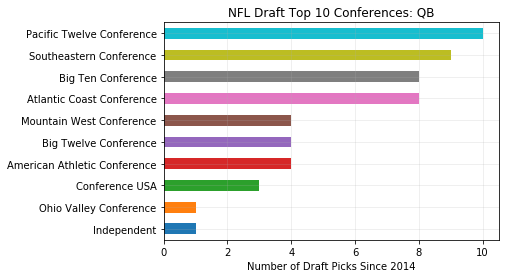

In [420]:
drafted_since2014 = drafted_bio[drafted_bio['draft_year'] >= 2014]
conf_total = drafted_since2014['college_conf'].value_counts()
top_conf = conf_total[:10].sort_values(ascending=True)
top_qb_conf = top_conf.plot.barh(title='NFL Draft Top 10 Conferences: QB')
plt.grid(alpha=.25)

top_qb_conf.set_xlabel("Number of Draft Picks Since 2014")



plt.savefig('Graphs/Top_10_QB_Conferences_since2014.png')

In [203]:
drafted_bio_draft_gb = drafted_bio_draft_df['draft_round'].value_counts()
drafted_bio_draft_gb = drafted_bio_draft_df.groupby(['college_conf','college','player_name'])
drafted_bio_draft_gb.sum()


drafted_bio_draft_gb = pd.DataFrame((drafted_bio_draft_gb).sum())

drafted_bio_draft_gb = drafted_bio_draft_gb.sort_values(by=['college_conf', 'college', 'player_name', 'draft_year', 'draft_round', 'draft_number'])
drafted_bio_draft_gb.to_csv(f"Resources/bio_draft_drafted_groupedby.csv", index=False)
drafted_bio = drafted_bio_draft_gb.reset_index()
drafted_bio



,college_conf,college,player_name,height,rookie_year,weight,draft_year,draft_round,draft_number
0,American Athletic Conference,Central Florida,Blake Bortles,77,2014.0,236.0,2014,1,3
1,American Athletic Conference,Louisville,Teddy Bridgewater,74,2014.0,215.0,2014,1,32
2,American Athletic Conference,Memphis,Paxton Lynch,79,2016.0,244.0,2016,1,26
3,American Athletic Conference,Southern Methodist,Garrett Gilbert,76,2014.0,230.0,2014,6,214
4,Atlantic Coast Conference,Boston College,Matt Hasselbeck,76,1998.0,235.0,1998,6,187
5,Atlantic Coast Conference,Boston College,Matt Ryan,76,2008.0,217.0,2008,1,3
6,Atlantic Coast Conference,Clemson,Charlie Whitehurst,77,2006.0,226.0,2006,3,81
7,Atlantic Coast Conference,Clemson,Deshaun Watson,74,2017.0,221.0,2017,1,12
8,Atlantic Coast Conference,Duke,Sean Renfree,77,2013.0,225.0,2013,7,249
9,Atlantic Coast Conference,Florida State,Christian Ponder,74,2011.0,229.0,2011,1,12


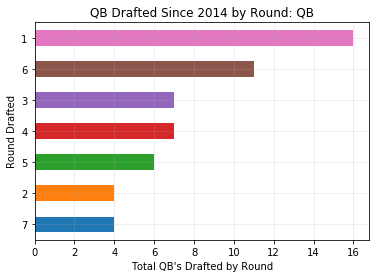

In [705]:
drafted_since2014 = drafted_bio[drafted_bio['draft_year'] >= 2014]
top_round = drafted_since2014['draft_round'].value_counts()
top_round = top_round.sort_values(ascending=True)
top_qb_round = top_round.plot.barh(title='QB Drafted Since 2014 by Round: QB')
top_qb_round;

top_qb_round.set_xlabel("Total QB's Drafted by Round")
top_qb_round.set_ylabel("Round Drafted")
plt.grid(alpha=.25)

plt.savefig('Graphs/Rounds_QB_Drafted_since2014.png')




In [694]:
top_colleges

college
Southern California    6
Michigan State         4
Tennessee              4
California             3
Florida State          3
Louisiana State        3
Michigan               3
North Carolina         3
Name: draft_round, dtype: int64

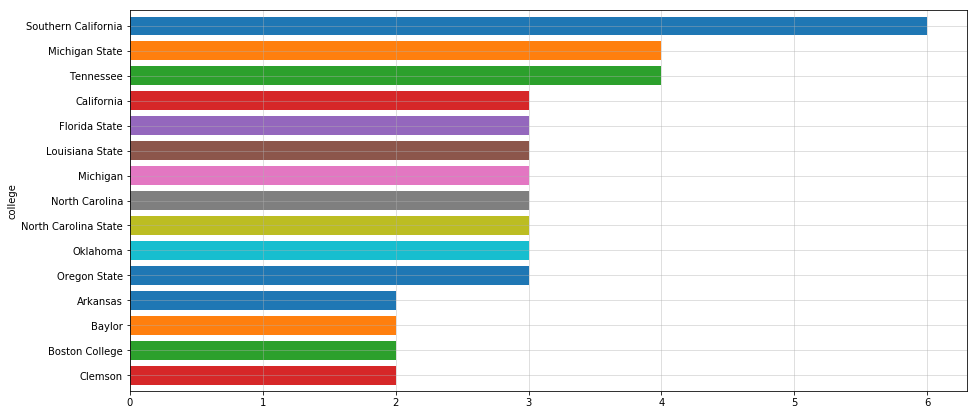

In [701]:
barWidth = .75
fig, ax = plt.subplots(figsize=(15,7))

top_colleges = all_bio_draft_df.groupby(['college'])['player_name'].count().nlargest(15)     

top_colleges.plot(ax=ax,kind='barh', width=barWidth).invert_yaxis()

plt.grid(alpha=.5)

plt.savefig('Graphs/Top_15_Colleges.png')

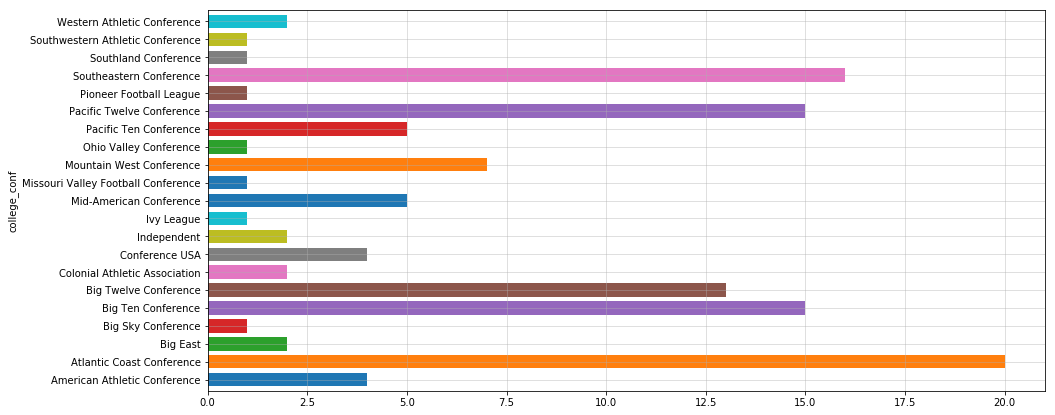

In [534]:
barWidth = .75
fig, ax = plt.subplots(figsize=(15,7))
# use unstack()
drafted_bio.groupby(['college_conf'])['draft_round'].count().plot(ax=ax,kind='barh', width=barWidth)
plt.grid(alpha=.5)

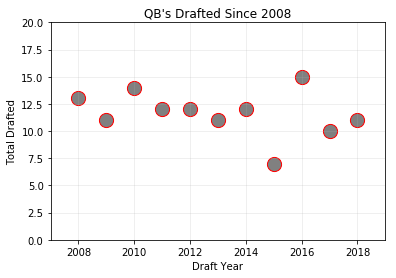

In [675]:
drafted_peryear= drafted_bio[drafted_bio['draft_year'] >= 2008]
drafted_since2008 = drafted_peryear['draft_year'].value_counts()
drafted_since2008 = pd.DataFrame(drafted_since2008)

# The maximum x value for our chart will be 100
x_limit = 2019

draft_year = [2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018]
year_total = [13,11,14,12,12,11,12,7,15,10,11]
plt.scatter(draft_year, year_total, marker="o", facecolors="grey", edgecolors="red", s=200)
plt.title("QB's Drafted Since 2008")
plt.ylabel("Total Drafted")
plt.xlabel("Draft Year")
plt.ylim(0,20)
plt.xlim(2007, x_limit)
plt.grid(alpha=.25)

plt.savefig('Graphs/QB_drafted_since2008.png')
#http://www.nfl.com/draft/history/fulldraft?type=position


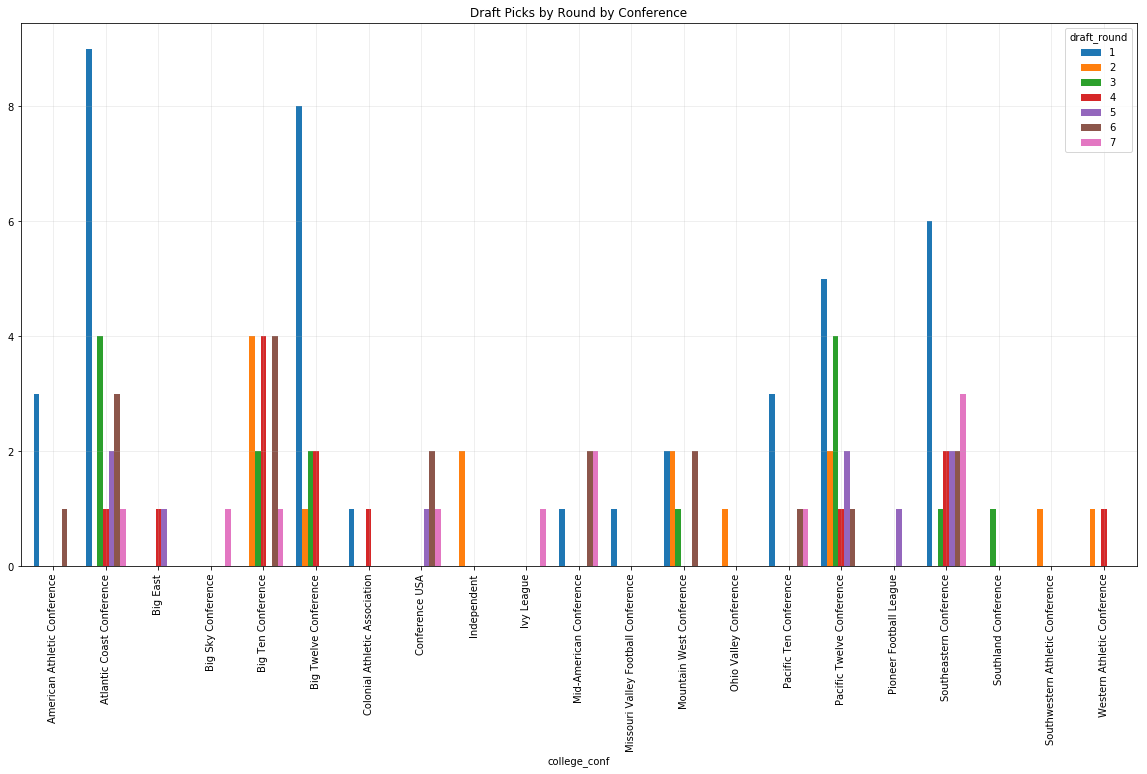

In [682]:
barWidth = .75

fig, ax = plt.subplots(figsize=(20,10))
conf_by_round = drafted_bio_draft_df.groupby(['college_conf','draft_round']).count()['draft_year']\
                .unstack().plot(ax=ax,kind='bar', width=barWidth, title='Draft Picks by Round by Conference')
conf_by_round 

plt.grid(alpha=.25)
plt.savefig('Graphs/conference_draftpick_by_round.png')

#this shows conferences who have had QB's drafted from their conference since 99

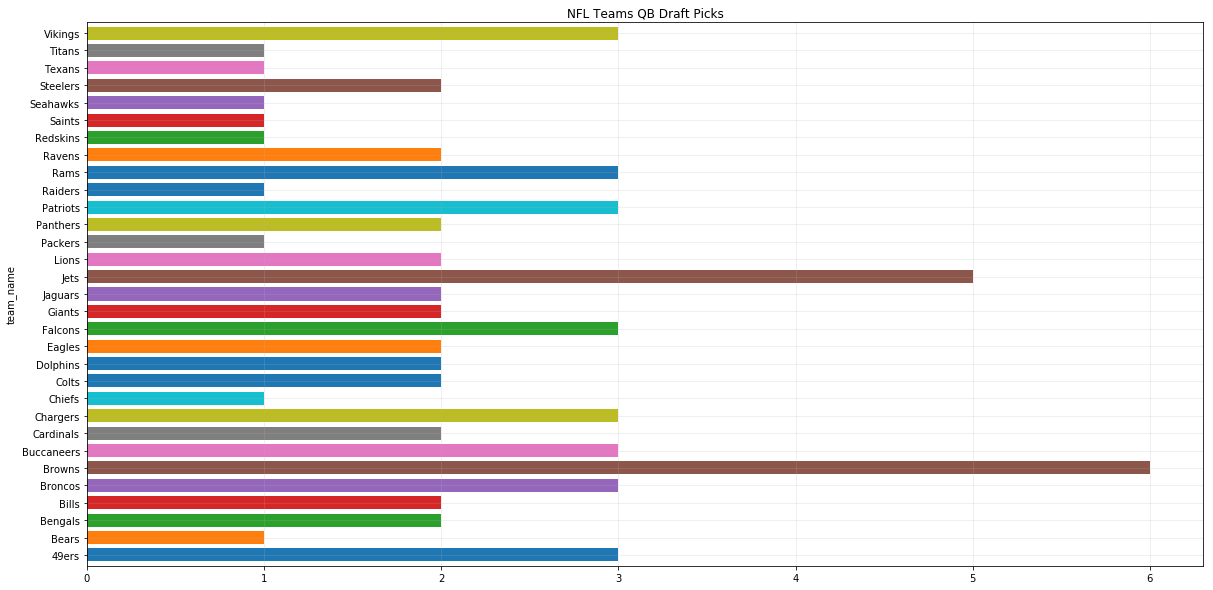

In [680]:
barWidth = .75
fig, ax = plt.subplots(figsize=(20,10))
# use unstack()
team_draftpicks = drafted_bio_draft_df[drafted_bio_draft_df['draft_round']<=3]
team_draftpicks.groupby(['team_name']).position.count().plot(ax=ax,kind='barh', width=barWidth, title="NFL Teams QB Draft Picks")
plt.grid(alpha=.25)

plt.savefig('Graphs/NFL_Teams_Drafts_top3rounds.png')

In [702]:
#make undrafted_bio_draft_df CSV

undrafted_bio_df = all_bio_draft_df[all_bio_draft_df['draft_year']== 0.0]
undrafted_bio_df = undrafted_bio.reset_index()
undrafted_bio_df = undrafted_bio_df.drop(columns = ['index'])

undrafted_bio_df.to_csv(f"Resources/bio_draft_undrafted_df.csv", index=False)
undrafted_bio_df


,draft_year,college_conf,college,player_name,draft_round,draft_number,timestamp,height,rookie_year,weight
0,0.0,0,Texas-El Paso,Jordan Palmer,0.0,0.0,1554745278,77,0.0,229.0
1,0.0,0,Washington,Jake Locker,0.0,0.0,1554745278,75,0.0,223.0
2,0.0,American Athletic Conference,Houston,Case Keenum,0.0,0.0,1554745278,73,2012.0,205.0
3,0.0,American Athletic Conference,Houston,Kyle Allen,0.0,0.0,1554745278,75,2018.0,211.0
4,0.0,American Athletic Conference,Temple,Phillip Walker,0.0,0.0,1554745278,71,2017.0,216.0
5,0.0,American Athletic Conference,Tulane,Ryan Griffin,0.0,0.0,1554745278,77,2013.0,210.0
6,0.0,Atlantic Coast Conference,Duke,Thaddeus Lewis,0.0,0.0,1554745278,74,2010.0,219.0
7,0.0,Atlantic Coast Conference,Maryland,Shaun Hill,0.0,0.0,1554745278,75,2002.0,230.0
8,0.0,Atlantic Coast Conference,Miami,Stephen Morris,0.0,0.0,1554745278,74,2014.0,218.0
9,0.0,Atlantic Coast Conference,North Carolina,Bryn Renner,0.0,0.0,1554745278,75,2014.0,225.0


In [35]:
undrafted_bio_draft_gb = undrafted_bio_df.groupby(['draft_year','college_conf',
                                                   'college','player_name',
                                                   'draft_round','draft_number']).sum()




undrafted_bio_draft_gb.to_csv(f"Resources/bio_draft_undrafted_groupedby.csv", index=False)

undrafted_bio = undrafted_bio_draft_gb.reset_index()
undrafted_bio.head()
#eliminate all rows/columns that arent "0.0"

,draft_year,college_conf,college,player_name,draft_round,draft_number,timestamp,height,rookie_year,weight
0,0.0,0,Texas-El Paso,Jordan Palmer,0.0,0.0,1554745278,77,0.0,229.0
1,0.0,0,Washington,Jake Locker,0.0,0.0,1554745278,75,0.0,223.0
2,0.0,American Athletic Conference,Houston,Case Keenum,0.0,0.0,1554745278,73,2012.0,205.0
3,0.0,American Athletic Conference,Houston,Kyle Allen,0.0,0.0,1554745278,75,2018.0,211.0
4,0.0,American Athletic Conference,Temple,Phillip Walker,0.0,0.0,1554745278,71,2017.0,216.0


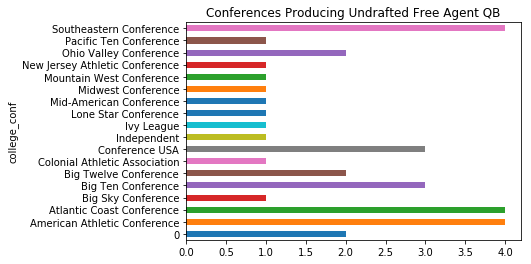

In [683]:
undrafted = undrafted_bio.groupby(['college_conf'])['player_name'].count()

undrafted.plot.barh(title='Conferences Producing Undrafted Free Agent QB')

plt.savefig('Graphs/Conference_producing_undrafted.png')

# Player Seasons

In [37]:
players_seasons = []

for qb in range(len(all_QBs_profile_df)):
    for season in range(len(all_QBs_profile_df['seasons'][qb])):
        players_seasons.append({          
            'player_id'    : all_QBs_profile_df['id'][qb],
            'player_name'  : all_QBs_profile_df['name'][qb],
            'position'     : all_QBs_profile_df['position'][qb],
            'season_year'  : all_QBs_profile_df['seasons'][qb][season]['year'],
            'season_type'  : all_QBs_profile_df['seasons'][qb][season]['type'], 
            'team_id'      : all_QBs_profile_df['seasons'][qb][season]['teams'][0]['id'],
            'team_name'    : all_QBs_profile_df['seasons'][qb][season]['teams'][0]['name'],
            'team_market'  : all_QBs_profile_df['seasons'][qb][season]['teams'][0]['market'],
            'games_played' : all_QBs_profile_df['seasons'][qb][season]['teams'][0]['statistics']['games_played'],
            'games_started': all_QBs_profile_df['seasons'][qb][season]['teams'][0]['statistics']['games_started'],

            '_timestamp'  : round(time.time())
        })

players_seasons_df = pd.DataFrame(players_seasons)
players_seasons_df.to_csv(f"Resources/players_seasons.csv", index=False)
players_seasons_df

,_timestamp,games_played,games_started,player_id,player_name,position,season_type,season_year,team_id,team_market,team_name
0,1554745308,1,0,41c44740-d0f6-44ab-8347-3b5d515e5ecf,Tom Brady,QB,REG,2000,97354895-8c77-4fd4-a860-32e62ea7382a,New England,Patriots
1,1554745308,3,3,41c44740-d0f6-44ab-8347-3b5d515e5ecf,Tom Brady,QB,PST,2001,97354895-8c77-4fd4-a860-32e62ea7382a,New England,Patriots
2,1554745308,15,14,41c44740-d0f6-44ab-8347-3b5d515e5ecf,Tom Brady,QB,REG,2001,97354895-8c77-4fd4-a860-32e62ea7382a,New England,Patriots
3,1554745308,16,16,41c44740-d0f6-44ab-8347-3b5d515e5ecf,Tom Brady,QB,REG,2002,97354895-8c77-4fd4-a860-32e62ea7382a,New England,Patriots
4,1554745308,3,3,41c44740-d0f6-44ab-8347-3b5d515e5ecf,Tom Brady,QB,PST,2003,97354895-8c77-4fd4-a860-32e62ea7382a,New England,Patriots
5,1554745308,16,16,41c44740-d0f6-44ab-8347-3b5d515e5ecf,Tom Brady,QB,REG,2003,97354895-8c77-4fd4-a860-32e62ea7382a,New England,Patriots
6,1554745308,3,3,41c44740-d0f6-44ab-8347-3b5d515e5ecf,Tom Brady,QB,PST,2004,97354895-8c77-4fd4-a860-32e62ea7382a,New England,Patriots
7,1554745308,16,16,41c44740-d0f6-44ab-8347-3b5d515e5ecf,Tom Brady,QB,REG,2004,97354895-8c77-4fd4-a860-32e62ea7382a,New England,Patriots
8,1554745308,2,2,41c44740-d0f6-44ab-8347-3b5d515e5ecf,Tom Brady,QB,PST,2005,97354895-8c77-4fd4-a860-32e62ea7382a,New England,Patriots
9,1554745308,16,16,41c44740-d0f6-44ab-8347-3b5d515e5ecf,Tom Brady,QB,REG,2005,97354895-8c77-4fd4-a860-32e62ea7382a,New England,Patriots


In [38]:
players_seasons_df.groupby(['season_year','player_name']).sum()

_timestamp  games_played  games_started
season_year player_name                                                
2000        Matt Hasselbeck     1554745308            16              0
            Peyton Manning      3109490616            17             13
            Tom Brady           1554745308             1              0
2001        Drew Brees          1554745309             1              0
            Matt Hasselbeck     1554745308            13             12
            Michael Vick        1554745308             8              2
            Peyton Manning      1554745308            16             16
            Tom Brady           3109490616            18             17
2002        Drew Brees          1554745309            16             16
            Josh McCown         1554745309             2              0
            Matt Hasselbeck     1554745308            16             10
            Michael Vick        3109490616            17             17
            Peyton Manning      3109490616            17             17
            Shaun Hill          1554745309             0              0
            Tom Brady           1554745308            16             16
2003        Carson Palmer       1554745309             0              0
            Drew Brees          1554745309            11             11
            Josh McCown         1554745309            10              3
            Matt Hasselbeck     3109490616            17             17
            Michael Vick        1554745308             5              4
            Peyton Manning      3109490616            19             19
            Shaun Hill          1554745309             0              0
            Tom Brady           3109490616            19             19
            Tony Romo           3109490616             0              0
2004        Ben Roethlisberger  3109490616            16             15
            Carson Palmer       1554745309            13             13
            Drew Brees          3109490618            16             16
            Eli Manning         1554745308             9              7
            Josh McCown         1554745309            14             13
            Luke McCown         1554745309             5              4
...                                    ...           ...            ...
2018        Matt Schaub         1554745308             3              0
            Matthew Stafford    1554745309            16             16
            Mike Glennon        1554745309             2              0
            Mike White          3109490618             0              0
            Mitchell Trubisky   3109490618            15             15
            Nate Sudfeld        3109490618             2              0
            Nathan Peterman     1554745309             4              2
            Nick Foles          3109490616             7              7
            Nick Mullens        1554745309             8              8
            Patrick Mahomes II  3109490618            18             18
            Philip Rivers       3109490616            18             18
            Phillip Walker      1554745309             0              0
            Robert Griffin III  3109490616             3              0
            Russell Wilson      3109490618            17             17
            Ryan Fitzpatrick    1554745308             8              7
            Ryan Griffin        1554745309             0              0
            Ryan Tannehill      1554745308            11             11
            Sam Bradford        1554745309             3              3
            Sam Darnold         1554745309            13             13
            Sean Mannion        3109490618             3              0
            Tanner Lee          1554745309             0              0
            Taylor Heinicke     1554745309             6              1
            Taysom Hill         3109490618            18              4


# Player Stats - Rushing for all seasons

In [39]:
stats_name       = 'rushing'
output_file_name = 'Resources/player_stats_rushing.csv'
player_stats_lst = []

for qb in range(len(all_QBs_profile_df)):
    for season in range(len(all_QBs_profile_df['seasons'][qb])):
        player_stats_dic = {}
        if all_QBs_profile_df['seasons'][qb][season]['teams'][0]['statistics']['games_played'] > 0:
            if stats_name in all_QBs_profile_df['seasons'][qb][season]['teams'][0]['statistics'].keys():
                player_stats_dic['player_id']     = all_QBs_profile_df['id'][qb]
                player_stats_dic['player_name']   = all_QBs_profile_df['name'][qb]
                player_stats_dic['position']      = all_QBs_profile_df['position'][qb]
                player_stats_dic['season_year']   = all_QBs_profile_df['seasons'][qb][season]['year']
                player_stats_dic['season_type']   = all_QBs_profile_df['seasons'][qb][season]['type']
                player_stats_dic['team_name']     = all_QBs_profile_df['seasons'][qb][season]['teams'][0]['name']
                player_stats_dic['team_market']   = all_QBs_profile_df['seasons'][qb][season]['teams'][0]['market']
                player_stats_dic['games_played']  = all_QBs_profile_df['seasons'][qb][season]['teams'][0]['statistics']['games_played']
                player_stats_dic['games_started'] = all_QBs_profile_df['seasons'][qb][season]['teams'][0]['statistics']['games_started']
                player_stats_dic['_timestamp']    = round(time.time())

                for k,v in all_QBs_profile_df['seasons'][qb][season]['teams'][0]['statistics'][stats_name].items():
                    stat = "stat_"+k
                    player_stats_dic[stat] = v

                player_stats_lst.append(player_stats_dic)

player_stats_df = pd.DataFrame(player_stats_lst)
player_stats_df.to_csv(output_file_name, index=False)
player_stats_df

,_timestamp,games_played,games_started,player_id,player_name,position,season_type,season_year,stat_attempts,stat_avg_yards,...,stat_longest_touchdown,stat_redzone_attempts,stat_scrambles,stat_tlost,stat_tlost_yards,stat_touchdowns,stat_yards,stat_yards_after_contact,team_market,team_name
0,1554745310,3,3,41c44740-d0f6-44ab-8347-3b5d515e5ecf,Tom Brady,QB,PST,2001,8,2.750,...,6,2,NaN,NaN,NaN,1,22,NaN,New England,Patriots
1,1554745310,15,14,41c44740-d0f6-44ab-8347-3b5d515e5ecf,Tom Brady,QB,REG,2001,36,1.194,...,0,6,0.0,0.0,0.0,0,43,0.0,New England,Patriots
2,1554745310,16,16,41c44740-d0f6-44ab-8347-3b5d515e5ecf,Tom Brady,QB,REG,2002,42,2.619,...,10,4,0.0,0.0,0.0,1,110,0.0,New England,Patriots
3,1554745310,3,3,41c44740-d0f6-44ab-8347-3b5d515e5ecf,Tom Brady,QB,PST,2003,12,1.500,...,0,3,0.0,0.0,0.0,0,18,0.0,New England,Patriots
4,1554745310,16,16,41c44740-d0f6-44ab-8347-3b5d515e5ecf,Tom Brady,QB,REG,2003,42,1.500,...,1,8,0.0,0.0,0.0,1,63,0.0,New England,Patriots
5,1554745310,3,3,41c44740-d0f6-44ab-8347-3b5d515e5ecf,Tom Brady,QB,PST,2004,7,0.429,...,1,2,0.0,0.0,0.0,1,3,0.0,New England,Patriots
6,1554745310,16,16,41c44740-d0f6-44ab-8347-3b5d515e5ecf,Tom Brady,QB,REG,2004,43,0.651,...,0,4,0.0,0.0,0.0,0,28,0.0,New England,Patriots
7,1554745310,2,2,41c44740-d0f6-44ab-8347-3b5d515e5ecf,Tom Brady,QB,PST,2005,3,2.667,...,0,0,0.0,0.0,0.0,0,8,0.0,New England,Patriots
8,1554745310,16,16,41c44740-d0f6-44ab-8347-3b5d515e5ecf,Tom Brady,QB,REG,2005,27,3.296,...,3,6,0.0,0.0,0.0,1,89,0.0,New England,Patriots
9,1554745310,3,3,41c44740-d0f6-44ab-8347-3b5d515e5ecf,Tom Brady,QB,PST,2006,8,2.250,...,0,2,0.0,0.0,0.0,0,18,0.0,New England,Patriots


In [42]:
player_stats_df.columns

Index(['_timestamp', 'games_played', 'games_started', 'player_id',
       'player_name', 'position', 'season_type', 'season_year',
       'stat_attempts', 'stat_avg_yards', 'stat_broken_tackles',
       'stat_kneel_downs', 'stat_longest', 'stat_longest_touchdown',
       'stat_redzone_attempts', 'stat_scrambles', 'stat_tlost',
       'stat_tlost_yards', 'stat_touchdowns', 'stat_yards',
       'stat_yards_after_contact', 'team_market', 'team_name'],
      dtype='object')

# Player Stats - Receiving for all seasons

In [43]:
stats_name       = 'receiving'
output_file_name = 'Resources/player_stats_receiving.csv'
player_stats_lst = []

for qb in range(len(all_QBs_profile_df)):
    for season in range(len(all_QBs_profile_df['seasons'][qb])):
        player_stats_dic = {}
        if all_QBs_profile_df['seasons'][qb][season]['teams'][0]['statistics']['games_played'] > 0:
            if stats_name in all_QBs_profile_df['seasons'][qb][season]['teams'][0]['statistics'].keys():
                player_stats_dic['player_id']     = all_QBs_profile_df['id'][qb]
                player_stats_dic['player_name']   = all_QBs_profile_df['name'][qb]
                player_stats_dic['position']      = all_QBs_profile_df['position'][qb]
                player_stats_dic['season_year']   = all_QBs_profile_df['seasons'][qb][season]['year']
                player_stats_dic['season_type']   = all_QBs_profile_df['seasons'][qb][season]['type']
                player_stats_dic['team_name']     = all_QBs_profile_df['seasons'][qb][season]['teams'][0]['name']
                player_stats_dic['team_market']   = all_QBs_profile_df['seasons'][qb][season]['teams'][0]['market']
                player_stats_dic['games_played']  = all_QBs_profile_df['seasons'][qb][season]['teams'][0]['statistics']['games_played']
                player_stats_dic['games_started'] = all_QBs_profile_df['seasons'][qb][season]['teams'][0]['statistics']['games_started']
                player_stats_dic['_timestamp']    = round(time.time())

                for k,v in all_QBs_profile_df['seasons'][qb][season]['teams'][0]['statistics'][stats_name].items():
                    stat = "stat_"+k
                    player_stats_dic[stat] = v

                player_stats_lst.append(player_stats_dic)

player_stats_df = pd.DataFrame(player_stats_lst)
player_stats_df.to_csv(output_file_name, index=False)
player_stats_df

,_timestamp,games_played,games_started,player_id,player_name,position,season_type,season_year,stat_air_yards,stat_avg_yards,...,stat_longest_touchdown,stat_receptions,stat_redzone_targets,stat_targets,stat_touchdowns,stat_yards,stat_yards_after_catch,stat_yards_after_contact,team_market,team_name
0,1554745322,15,14,41c44740-d0f6-44ab-8347-3b5d515e5ecf,Tom Brady,QB,REG,2001,23,23.000,...,0,1,0,1,0,23,0,0,New England,Patriots
1,1554745322,16,16,41c44740-d0f6-44ab-8347-3b5d515e5ecf,Tom Brady,QB,REG,2015,7,36.000,...,0,1,0,1,0,36,29,0,New England,Patriots
2,1554745322,3,3,41c44740-d0f6-44ab-8347-3b5d515e5ecf,Tom Brady,QB,PST,2017,0,0.000,...,0,0,0,1,0,0,0,0,New England,Patriots
3,1554745322,16,16,41c44740-d0f6-44ab-8347-3b5d515e5ecf,Tom Brady,QB,REG,2018,0,6.000,...,0,1,0,1,0,6,6,0,New England,Patriots
4,1554745322,6,2,42de9d1d-0352-460b-9172-9452414fd7fd,Jimmy Garoppolo,QB,REG,2016,-4,3.000,...,0,1,0,1,0,3,7,0,New England,Patriots
5,1554745322,16,16,5812204c-6dae-4450-8011-99e0f72864ac,Ryan Tannehill,QB,REG,2014,-7,-4.000,...,0,1,0,1,0,-4,3,0,Miami,Dolphins
6,1554745322,16,16,5812204c-6dae-4450-8011-99e0f72864ac,Ryan Tannehill,QB,REG,2015,3,9.000,...,0,1,0,1,0,9,6,0,Miami,Dolphins
7,1554745322,11,11,5812204c-6dae-4450-8011-99e0f72864ac,Ryan Tannehill,QB,REG,2018,2,3.000,...,3,1,1,1,1,3,1,0,Miami,Dolphins
8,1554745322,15,15,b797d6fa-1520-4b3d-a212-157afd4a3bd0,Michael Vick,QB,REG,2002,16,0.000,...,0,0,0,0,0,16,0,0,Atlanta,Falcons
9,1554745322,2,2,b797d6fa-1520-4b3d-a212-157afd4a3bd0,Michael Vick,QB,PST,2004,2,2.000,...,0,1,0,1,0,2,0,0,Atlanta,Falcons


In [44]:
len(player_stats_df)

107

# Player Stats - Penalties for all seasons

In [45]:
stats_name       = 'penalties'
output_file_name = 'Resources/player_stats_penalties.csv'
player_stats_lst = []

for qb in range(len(all_QBs_profile_df)):
    for season in range(len(all_QBs_profile_df['seasons'][qb])):
        player_stats_dic = {}
        if all_QBs_profile_df['seasons'][qb][season]['teams'][0]['statistics']['games_played'] > 0:
            if stats_name in all_QBs_profile_df['seasons'][qb][season]['teams'][0]['statistics'].keys():
                player_stats_dic['player_id']     = all_QBs_profile_df['id'][qb]
                player_stats_dic['player_name']   = all_QBs_profile_df['name'][qb]
                player_stats_dic['position']      = all_QBs_profile_df['position'][qb]
                player_stats_dic['season_year']   = all_QBs_profile_df['seasons'][qb][season]['year']
                player_stats_dic['season_type']   = all_QBs_profile_df['seasons'][qb][season]['type']
                player_stats_dic['team_name']     = all_QBs_profile_df['seasons'][qb][season]['teams'][0]['name']
                player_stats_dic['team_market']   = all_QBs_profile_df['seasons'][qb][season]['teams'][0]['market']
                player_stats_dic['games_played']  = all_QBs_profile_df['seasons'][qb][season]['teams'][0]['statistics']['games_played']
                player_stats_dic['games_started'] = all_QBs_profile_df['seasons'][qb][season]['teams'][0]['statistics']['games_started']
                player_stats_dic['_timestamp']    = round(time.time())

                for k,v in all_QBs_profile_df['seasons'][qb][season]['teams'][0]['statistics'][stats_name].items():
                    stat = "stat_"+k
                    player_stats_dic[stat] = v

                player_stats_lst.append(player_stats_dic)

player_stats_df = pd.DataFrame(player_stats_lst)
player_stats_df.to_csv(output_file_name, index=False)
player_stats_df

,_timestamp,games_played,games_started,player_id,player_name,position,season_type,season_year,stat_penalties,stat_yards,team_market,team_name
0,1554745324,15,14,41c44740-d0f6-44ab-8347-3b5d515e5ecf,Tom Brady,QB,REG,2001,1,5,New England,Patriots
1,1554745324,16,16,41c44740-d0f6-44ab-8347-3b5d515e5ecf,Tom Brady,QB,REG,2002,3,25,New England,Patriots
2,1554745324,3,3,41c44740-d0f6-44ab-8347-3b5d515e5ecf,Tom Brady,QB,PST,2003,1,5,New England,Patriots
3,1554745324,16,16,41c44740-d0f6-44ab-8347-3b5d515e5ecf,Tom Brady,QB,REG,2003,6,50,New England,Patriots
4,1554745324,3,3,41c44740-d0f6-44ab-8347-3b5d515e5ecf,Tom Brady,QB,PST,2004,1,5,New England,Patriots
5,1554745324,16,16,41c44740-d0f6-44ab-8347-3b5d515e5ecf,Tom Brady,QB,REG,2004,4,17,New England,Patriots
6,1554745324,16,16,41c44740-d0f6-44ab-8347-3b5d515e5ecf,Tom Brady,QB,REG,2005,2,25,New England,Patriots
7,1554745324,16,16,41c44740-d0f6-44ab-8347-3b5d515e5ecf,Tom Brady,QB,REG,2006,3,15,New England,Patriots
8,1554745324,16,16,41c44740-d0f6-44ab-8347-3b5d515e5ecf,Tom Brady,QB,REG,2007,2,17,New England,Patriots
9,1554745324,1,1,41c44740-d0f6-44ab-8347-3b5d515e5ecf,Tom Brady,QB,PST,2009,1,5,New England,Patriots


In [46]:
len(player_stats_df)

534

# Player Stats - Passing for all seasons

In [47]:
stats_name       = 'passing'
output_file_name = 'Resources/player_stats_passing.csv'
player_stats_lst = []

for qb in range(len(all_QBs_profile_df)):
    for season in range(len(all_QBs_profile_df['seasons'][qb])):
        player_stats_dic = {}
        if all_QBs_profile_df['seasons'][qb][season]['teams'][0]['statistics']['games_played'] > 0:
            if stats_name in all_QBs_profile_df['seasons'][qb][season]['teams'][0]['statistics'].keys():
                player_stats_dic['player_id']     = all_QBs_profile_df['id'][qb]
                player_stats_dic['player_name']   = all_QBs_profile_df['name'][qb]
                player_stats_dic['position']      = all_QBs_profile_df['position'][qb]
                player_stats_dic['season_year']   = all_QBs_profile_df['seasons'][qb][season]['year']
                player_stats_dic['season_type']   = all_QBs_profile_df['seasons'][qb][season]['type']
                player_stats_dic['team_name']     = all_QBs_profile_df['seasons'][qb][season]['teams'][0]['name']
                player_stats_dic['team_market']   = all_QBs_profile_df['seasons'][qb][season]['teams'][0]['market']
                player_stats_dic['games_played']  = all_QBs_profile_df['seasons'][qb][season]['teams'][0]['statistics']['games_played']
                player_stats_dic['games_started'] = all_QBs_profile_df['seasons'][qb][season]['teams'][0]['statistics']['games_started']
                player_stats_dic['_timestamp']    = round(time.time())

                for k,v in all_QBs_profile_df['seasons'][qb][season]['teams'][0]['statistics'][stats_name].items():
                    stat = "stat_"+k
                    player_stats_dic[stat] = v

                player_stats_lst.append(player_stats_dic)

player_stats_df = pd.DataFrame(player_stats_lst)
player_stats_df.to_csv(output_file_name, index=False)
player_stats_df

,_timestamp,games_played,games_started,player_id,player_name,position,season_type,season_year,stat_air_yards,stat_attempts,...,stat_rating,stat_redzone_attempts,stat_sack_yards,stat_sacks,stat_spikes,stat_throw_aways,stat_touchdowns,stat_yards,team_market,team_name
0,1554745326,1,0,41c44740-d0f6-44ab-8347-3b5d515e5ecf,Tom Brady,QB,REG,2000,0,3,...,42.4,0,0,0,0.0,0.0,0,6,New England,Patriots
1,1554745326,3,3,41c44740-d0f6-44ab-8347-3b5d515e5ecf,Tom Brady,QB,PST,2001,0,97,...,77.3,6,36,5,NaN,NaN,1,572,New England,Patriots
2,1554745326,15,14,41c44740-d0f6-44ab-8347-3b5d515e5ecf,Tom Brady,QB,REG,2001,0,413,...,86.5,50,216,41,0.0,0.0,18,2843,New England,Patriots
3,1554745326,16,16,41c44740-d0f6-44ab-8347-3b5d515e5ecf,Tom Brady,QB,REG,2002,0,601,...,85.7,59,190,31,0.0,0.0,28,3764,New England,Patriots
4,1554745326,3,3,41c44740-d0f6-44ab-8347-3b5d515e5ecf,Tom Brady,QB,PST,2003,0,126,...,84.5,25,0,0,0.0,0.0,5,792,New England,Patriots
5,1554745326,16,16,41c44740-d0f6-44ab-8347-3b5d515e5ecf,Tom Brady,QB,REG,2003,0,527,...,85.9,69,219,32,0.0,0.0,23,3620,New England,Patriots
6,1554745326,3,3,41c44740-d0f6-44ab-8347-3b5d515e5ecf,Tom Brady,QB,PST,2004,0,81,...,109.4,14,57,7,0.0,0.0,5,587,New England,Patriots
7,1554745326,16,16,41c44740-d0f6-44ab-8347-3b5d515e5ecf,Tom Brady,QB,REG,2004,0,474,...,92.6,67,162,26,0.0,0.0,28,3692,New England,Patriots
8,1554745326,2,2,41c44740-d0f6-44ab-8347-3b5d515e5ecf,Tom Brady,QB,PST,2005,0,63,...,92.2,9,12,4,0.0,0.0,4,542,New England,Patriots
9,1554745326,16,16,41c44740-d0f6-44ab-8347-3b5d515e5ecf,Tom Brady,QB,REG,2005,0,530,...,92.3,58,188,26,0.0,0.0,26,4110,New England,Patriots


In [48]:
players_stat_passing = player_stats_df.groupby(['player_name'])['stat_touchdowns'].count()
players_stat_passing = pd.DataFrame(players_stat_passing)
players_stat_passing

,stat_touchdowns
player_name,
AJ McCarron,4
Aaron Rodgers,22
Alex Smith,18
Alex Tanney,1
Andrew Luck,10
Andy Dalton,12
Austin Davis,2
Baker Mayfield,1
Ben Roethlisberger,25


# Player Stats - Fumbles for all seasons

In [49]:
stats_name       = 'fumbles'
output_file_name = 'Resources/player_stats_fumbles.csv'
player_stats_lst = []

for qb in range(len(all_QBs_profile_df)):
    for season in range(len(all_QBs_profile_df['seasons'][qb])):
        player_stats_dic = {}
        if all_QBs_profile_df['seasons'][qb][season]['teams'][0]['statistics']['games_played'] > 0:
            if stats_name in all_QBs_profile_df['seasons'][qb][season]['teams'][0]['statistics'].keys():
                player_stats_dic['player_id']     = all_QBs_profile_df['id'][qb]
                player_stats_dic['player_name']   = all_QBs_profile_df['name'][qb]
                player_stats_dic['position']      = all_QBs_profile_df['position'][qb]
                player_stats_dic['season_year']   = all_QBs_profile_df['seasons'][qb][season]['year']
                player_stats_dic['season_type']   = all_QBs_profile_df['seasons'][qb][season]['type']
                player_stats_dic['team_name']     = all_QBs_profile_df['seasons'][qb][season]['teams'][0]['name']
                player_stats_dic['team_market']   = all_QBs_profile_df['seasons'][qb][season]['teams'][0]['market']
                player_stats_dic['games_played']  = all_QBs_profile_df['seasons'][qb][season]['teams'][0]['statistics']['games_played']
                player_stats_dic['games_started'] = all_QBs_profile_df['seasons'][qb][season]['teams'][0]['statistics']['games_started']
                player_stats_dic['_timestamp']    = round(time.time())

                for k,v in all_QBs_profile_df['seasons'][qb][season]['teams'][0]['statistics'][stats_name].items():
                    stat = "stat_"+k
                    player_stats_dic[stat] = v

                player_stats_lst.append(player_stats_dic)

player_stats_df = pd.DataFrame(player_stats_lst)
player_stats_df.to_csv(output_file_name, index=False)
player_stats_df.head()

,_timestamp,games_played,games_started,player_id,player_name,position,season_type,season_year,stat_ez_rec_tds,stat_forced_fumbles,...,stat_lost_fumbles,stat_opp_rec,stat_opp_rec_tds,stat_opp_rec_yards,stat_out_of_bounds,stat_own_rec,stat_own_rec_tds,stat_own_rec_yards,team_market,team_name
0,1554745327,3,3,41c44740-d0f6-44ab-8347-3b5d515e5ecf,Tom Brady,QB,PST,2001,0,0,...,0,0,0,0,0,1,0,0,New England,Patriots
1,1554745327,15,14,41c44740-d0f6-44ab-8347-3b5d515e5ecf,Tom Brady,QB,REG,2001,0,0,...,3,0,0,0,0,4,0,-18,New England,Patriots
2,1554745327,16,16,41c44740-d0f6-44ab-8347-3b5d515e5ecf,Tom Brady,QB,REG,2002,0,0,...,5,0,0,0,0,5,0,-32,New England,Patriots
3,1554745327,16,16,41c44740-d0f6-44ab-8347-3b5d515e5ecf,Tom Brady,QB,REG,2003,0,0,...,5,0,0,0,1,3,0,-5,New England,Patriots
4,1554745327,3,3,41c44740-d0f6-44ab-8347-3b5d515e5ecf,Tom Brady,QB,PST,2004,0,0,...,1,0,0,0,0,0,0,0,New England,Patriots


In [50]:
len(player_stats_df)

660

# Player Stats - Defense for all seasons

In [51]:
stats_name       = 'defense'
output_file_name = 'Resources/player_stats_defense.csv'
player_stats_lst = []

for qb in range(len(all_QBs_profile_df)):
    for season in range(len(all_QBs_profile_df['seasons'][qb])):
        player_stats_dic = {}
        if all_QBs_profile_df['seasons'][qb][season]['teams'][0]['statistics']['games_played'] > 0:
            if stats_name in all_QBs_profile_df['seasons'][qb][season]['teams'][0]['statistics'].keys():
                player_stats_dic['player_id']     = all_QBs_profile_df['id'][qb]
                player_stats_dic['player_name']   = all_QBs_profile_df['name'][qb]
                player_stats_dic['position']      = all_QBs_profile_df['position'][qb]
                player_stats_dic['season_year']   = all_QBs_profile_df['seasons'][qb][season]['year']
                player_stats_dic['season_type']   = all_QBs_profile_df['seasons'][qb][season]['type']
                player_stats_dic['team_name']     = all_QBs_profile_df['seasons'][qb][season]['teams'][0]['name']
                player_stats_dic['team_market']   = all_QBs_profile_df['seasons'][qb][season]['teams'][0]['market']
                player_stats_dic['games_played']  = all_QBs_profile_df['seasons'][qb][season]['teams'][0]['statistics']['games_played']
                player_stats_dic['games_started'] = all_QBs_profile_df['seasons'][qb][season]['teams'][0]['statistics']['games_started']
                player_stats_dic['_timestamp']    = round(time.time())

                for k,v in all_QBs_profile_df['seasons'][qb][season]['teams'][0]['statistics'][stats_name].items():
                    stat = "stat_"+k
                    player_stats_dic[stat] = v

                player_stats_lst.append(player_stats_dic)

player_stats_df = pd.DataFrame(player_stats_lst)
player_stats_df.to_csv(output_file_name, index=False)
player_stats_df.head()

,_timestamp,games_played,games_started,player_id,player_name,position,season_type,season_year,stat_assists,stat_blitzes,...,stat_sp_assists,stat_sp_blocks,stat_sp_forced_fumbles,stat_sp_fumble_recoveries,stat_sp_tackles,stat_tackles,stat_tloss,stat_tloss_yards,team_market,team_name
0,1554745329,3,3,41c44740-d0f6-44ab-8347-3b5d515e5ecf,Tom Brady,QB,PST,2001,0,NaN,...,0,0,0,0,0,0,0.0,0.0,New England,Patriots
1,1554745329,15,14,41c44740-d0f6-44ab-8347-3b5d515e5ecf,Tom Brady,QB,REG,2001,0,0.0,...,0,0,0,0,0,0,0.0,0.0,New England,Patriots
2,1554745329,16,16,41c44740-d0f6-44ab-8347-3b5d515e5ecf,Tom Brady,QB,REG,2002,0,0.0,...,0,0,0,0,0,0,0.0,0.0,New England,Patriots
3,1554745329,16,16,41c44740-d0f6-44ab-8347-3b5d515e5ecf,Tom Brady,QB,REG,2003,0,0.0,...,0,0,0,0,0,0,0.0,0.0,New England,Patriots
4,1554745329,16,16,41c44740-d0f6-44ab-8347-3b5d515e5ecf,Tom Brady,QB,REG,2004,0,0.0,...,0,0,0,0,0,0,0.0,0.0,New England,Patriots


In [52]:
len(player_stats_df)

550

# Player Stats - Conversions for all seasons

In [53]:
stats_name       = 'conversions'
output_file_name = 'Resources/player_stats_conversions.csv'
player_stats_lst = []

for qb in range(len(all_QBs_profile_df)):
    for season in range(len(all_QBs_profile_df['seasons'][qb])):
        player_stats_dic = {}
        if all_QBs_profile_df['seasons'][qb][season]['teams'][0]['statistics']['games_played'] > 0:
            if stats_name in all_QBs_profile_df['seasons'][qb][season]['teams'][0]['statistics'].keys():
                player_stats_dic['player_id']     = all_QBs_profile_df['id'][qb]
                player_stats_dic['player_name']   = all_QBs_profile_df['name'][qb]
                player_stats_dic['position']      = all_QBs_profile_df['position'][qb]
                player_stats_dic['season_year']   = all_QBs_profile_df['seasons'][qb][season]['year']
                player_stats_dic['season_type']   = all_QBs_profile_df['seasons'][qb][season]['type']
                player_stats_dic['team_name']     = all_QBs_profile_df['seasons'][qb][season]['teams'][0]['name']
                player_stats_dic['team_market']   = all_QBs_profile_df['seasons'][qb][season]['teams'][0]['market']
                player_stats_dic['games_played']  = all_QBs_profile_df['seasons'][qb][season]['teams'][0]['statistics']['games_played']
                player_stats_dic['games_started'] = all_QBs_profile_df['seasons'][qb][season]['teams'][0]['statistics']['games_started']
                player_stats_dic['_timestamp']    = round(time.time())

                for k,v in all_QBs_profile_df['seasons'][qb][season]['teams'][0]['statistics'][stats_name].items():
                    stat = "stat_"+k
                    player_stats_dic[stat] = v

                player_stats_lst.append(player_stats_dic)

player_stats_df = pd.DataFrame(player_stats_lst)
player_stats_df.to_csv(output_file_name, index=False)
player_stats_df.head()

,_timestamp,games_played,games_started,player_id,player_name,position,season_type,season_year,stat_defense_attempts,stat_defense_successes,stat_pass_attempts,stat_pass_successes,stat_receive_attempts,stat_receive_successes,stat_rush_attempts,stat_rush_successes,team_market,team_name
0,1554745330,16,16,41c44740-d0f6-44ab-8347-3b5d515e5ecf,Tom Brady,QB,REG,2002,0,0,4,2,0,0,0,0,New England,Patriots
1,1554745330,16,16,41c44740-d0f6-44ab-8347-3b5d515e5ecf,Tom Brady,QB,REG,2005,0,0,2,0,0,0,0,0,New England,Patriots
2,1554745330,16,16,41c44740-d0f6-44ab-8347-3b5d515e5ecf,Tom Brady,QB,REG,2006,0,0,2,2,0,0,0,0,New England,Patriots
3,1554745330,16,16,41c44740-d0f6-44ab-8347-3b5d515e5ecf,Tom Brady,QB,REG,2009,0,0,3,1,0,0,0,0,New England,Patriots
4,1554745330,16,16,41c44740-d0f6-44ab-8347-3b5d515e5ecf,Tom Brady,QB,REG,2010,0,0,1,0,0,0,0,0,New England,Patriots


In [54]:
len(player_stats_df)

352